<a href="https://colab.research.google.com/github/mateocapon/simulacion_tp1/blob/main/TP2_Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 4

Se desea simular la evolución de una epidemia utilizando el modelo S.I.R.
Se conoce que inicialmente el 3% de la población se encuentra infectada, toda la población es susceptible de
contagiarse, la tasa de transmisión β=0,27, y la tasa de recuperación γ = 0,043


Se pide:
- Implementar el modelo SIR correspondiente.
- Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución
de la epidemia.
- Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la
duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de
asistencia médica. ¿Qué parámetros modifica? ¿Por qué?


Pruebe con 3 distintos juegos de parámetros del modelo y comente los comportamientos explorados.

#Modelo SIR


##Variables 

S(t): Susceptibles

I(t): Infectados

R(t): Recuperados 

Infectados iniciales: 3%

Susceptibles iniciales: 100% (toda la población)

Recuperados iniciales: 0%

## Ecuaciones Diferenciales del Modelo


$ \frac{\mathrm dS} {\mathrm dt} = -\beta SI\ $

$ \frac{\mathrm dI} {\mathrm dt} = \beta SI-\gamma I\ $

$ \frac{\mathrm dR} {\mathrm dt} = \gamma I\ $


##Parametros

$ \beta $ : tasa de transmisión

$ \gamma $: tasa de recuperación

$ \frac{1} {\gamma} $: período medio de recuperación 

### Valores

$ \gamma = 0.043 $

$ \beta = 0.27 $

Entonces el periodo medio de recuperacion es de : $ \frac{1} {\gamma} =  \frac{1} {0.043} = 23.25$ ¿¿ dias o que??

##Implementacion del modelo del SIR utilizando RK4

In [99]:
# RK4
import numpy as np

def modelo_SIR(x, beta, gamma, n):
  #x(0) = S, x(1) = I,  x(2) = R
  xp = np.zeros((3, 1))
  xp[0] = -beta*x[0][n-1]*x[1][n-1]
  xp[1] = beta*x[0][n-1]*x[1][n-1] - gamma*x[1][n-1]
  xp[2] = gamma*x[1][n-1]

  return xp


def RK4(  x0, h, T , beta, gamma):
  t0 = T[0]
  tf = T[len(T)-1]

  N = round((tf-t0)/h) #Numero de pasos total
  t = np.zeros(N)

  x = np.zeros((3, N))

  t[0] = t0

  x=np.array(np.zeros((3, N)))
  x = np.delete(x, 0, axis=1)
  x = np.insert(x,0,x0,axis=1)
  
  for n in range(1, N):

    k1 = h* modelo_SIR( x, beta, gamma, n)
    k2 = h* modelo_SIR( x + 0.5*k1,beta, gamma, n)
    k3 = h* modelo_SIR( x + 0.5*k2, beta, gamma,n)
    k4 = h* modelo_SIR( x + k3, beta, gamma,n)

    k=(1/6)*(k1 + 2*k2 + 2*k3 + k4)

    for i in range(0, 3):
      x[i][n]=x[i][n-1]+k[i]

    t[n] = t[n-1] + h

  return x



##Simulacion de la epidemia

In [100]:
import matplotlib.pyplot as plt

def graficar_curvas(I,S,R,M):
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(M, color = 'black', label = 'Capacidad Sistema Medico')
  ax.plot(S, color = 'blue', label = 'Susceptibles')
  ax.plot(I, color = 'red', label = 'Infectados')
  ax.plot(R, color = 'green', label = 'Recuperados')
  plt.title("Evolucion de Enfermedad")
  ax.set_xlabel('Dias')
  ax.set_ylabel('Poblacion')
  plt.legend()
  plt.grid()
  plt.show()


Grafico Evolución de Pandemia con parametros del Ejercicio 


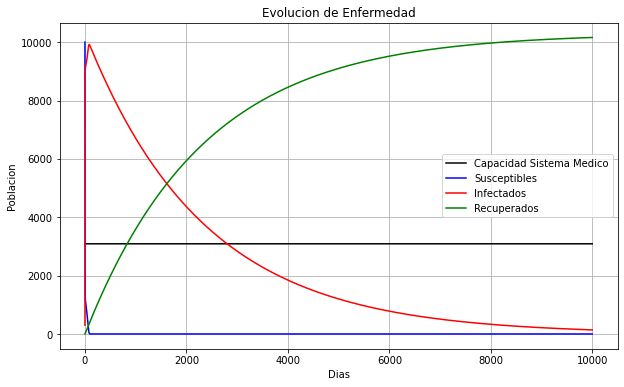

maximo de infectados 9917.109220510649
maximo de infectados para que no sature el sistema medico es: 3090.0


In [141]:
# Simulacion de un modelo de epidemias SIR
import numpy as np

# Condiciones iniciales
S0 = 10000
I0 = 0.03*S0
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 0.01
N = round((100-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Pandemia con parametros del Ejercicio 
beta = 0.027 
#beta= 0.27 #esta explotando con este valor de beta que es el que nos dan ellos
gamma = 0.043

Resultados = RK4(x , h, (0,100),beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("Grafico Evolución de Pandemia con parametros del Ejercicio ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("maximo de infectados",max_infect)
print("maximo de infectados para que no sature el sistema medico es:", 0.3*T0)


Esta explotando, hay parametros que no nos dieron ellos, como la poblacion total, el periodo de tiempo en el cual analizamos, o el paso en el cual avanzamos

para mi el paso deberia ser 1 porque seria cada 1 dia
el periodo de tiempo puede variar si vemos como avanza la epidemia

Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de asistencia médica. ¿Qué parámetros modifica? ¿Por qué?

Grafico Evolución de Pandemia con parametros del Ejercicio 


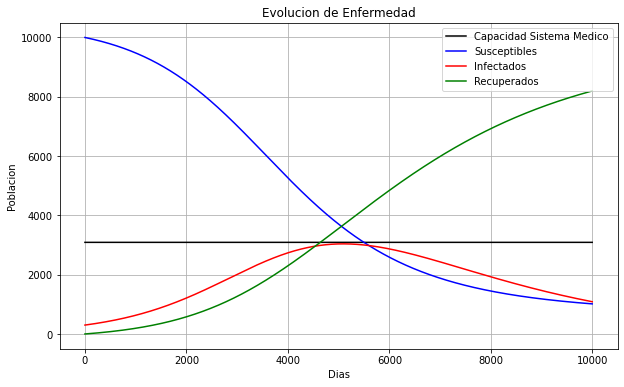

maximo de infectados 3039.1216459962275
maximo de infectados para que no sature el sistema medico es: 3090.0


In [125]:
#Codigo para calcular cuanto duraria la pandemia si hacemos que no colapse el sistema medico
#si cambian unicamente los susceptibles , baja en gran cantidad la evolucion de la curva
#esto implicaria que se vacuno a una parte de la poblacion por ejemplo
#cuanta mas gente vacunada, menos se satura el sistema sanitario
#otra forma de modificar la curva de infectados, seria bajando el nivel de contacto, lo que se haria mediante un aislamiento, para 
#que al haber menos contacto entre gente, hay menos infectados


# Simulacion de un modelo de epidemias SIR
import numpy as np

# Condiciones iniciales
S0 = 10000
I0 = 0.03*S0
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 0.01
N = round((100-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Pandemia con parametros del Ejercicio 
beta = 0.000012
gamma = 0.043

Resultados = RK4(x , h, (0,100),beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("Grafico Evolución de Pandemia con parametros del Ejercicio ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("maximo de infectados",max_infect)
print("maximo de infectados para que no sature el sistema medico es:", 0.3*T0)

Con un valor de beta de $\beta$ = 0.000012 el sistema medico no colapsa y la epidemia tendria una duracion de x

#Graficos Con Nuevos Parametros

Pruebe con 3 distintos juegos de parámetros del modelo y comente los comportamientos explorados.


Modificamos los parametros ... y asi la duracion de la pandemia tal que el sistema medico no colapse seria...

CASO 1


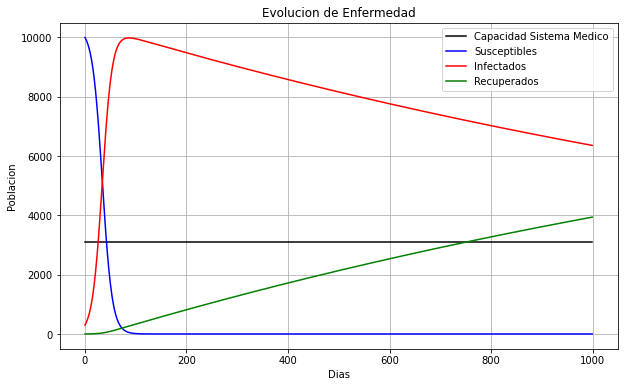

In [103]:
# Simulacion de un modelo de epidemias SIR
import numpy as np


# Condiciones iniciales
S0 = 10000
I0 = 0.03*S0
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 0.1
N = round((100-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N


# Caso 1 
beta = 0.0001
gamma = 0.005

Resultados = RK4(x , h, (0,100),beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("CASO 1")

graficar_curvas(I,S,R,M)



comentarios


aca nos morimos todos

CASO 2


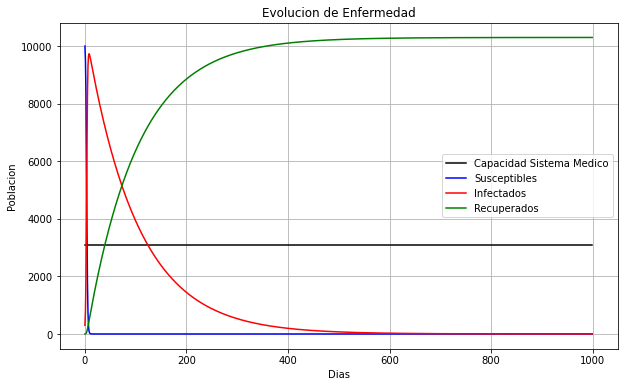

In [104]:
# Simulacion de un modelo de epidemias SIR
import numpy as np


# Condiciones iniciales
S0 = 10000
I0 = 0.03*S0
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 0.1
N = round((100-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Caso 2
beta = 0.001
gamma = 0.1

Resultados = RK4(x , h, (0,100),beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("CASO 2")

graficar_curvas(I,S,R,M)

comentarios

aca tambien morimos todos

CASO 3


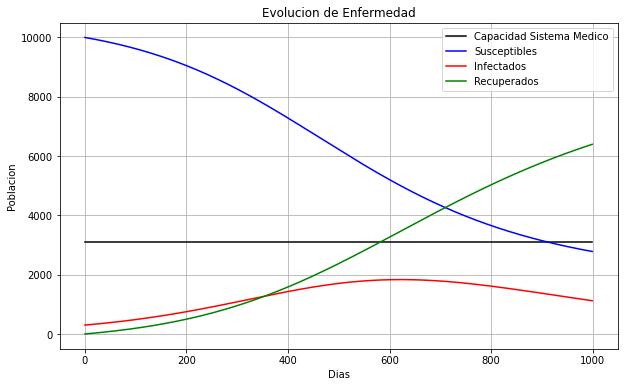

In [105]:
# Simulacion de un modelo de epidemias SIR
import numpy as np


# Condiciones iniciales
S0 = 10000
I0 = 0.03*S0
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 0.1
N = round((100-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Caso 3 
beta = 0.00001
gamma = 0.05

Resultados = RK4(x , h, (0,100),beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("CASO 3")

graficar_curvas(I,S,R,M)

comentarios 

aca si sobrevivimos y no colapsa el sistema de salud